# 4.10 Task Part 1b

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1.

In [2]:
# Making a path to the orders_products_aggregated file.
path = r'/Users/terencekeys/Downloads/Shawzz Folder/06-2023 Instacart Basket Analysis'

In [3]:
# Importing the df_merged_4.9.1 pickle file.
merged_4_9 = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'merged_4_9.csv'), index_col = False)

In [4]:
# Checking the dimensions of merged_4_9.
merged_4_9.head()

,Unnamed: 0,user_id,Gender,State,Age,date_joined,#_of_dependants,marital_status,income,order_id,...,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,region,customer_activity,income_level,age_group
0,0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity customer,High Income,Middle-aged
1,1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity customer,High Income,Middle-aged
2,2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity customer,High Income,Middle-aged
3,3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity customer,High Income,Middle-aged
4,4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity customer,High Income,Middle-aged


In [5]:
# Dropping unnecesary unnamed column.
merged_4_9.drop(columns = ['Unnamed: 0'])

,user_id,Gender,State,Age,date_joined,#_of_dependants,marital_status,income,order_id,order_number,...,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,region,customer_activity,income_level,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity customer,High Income,Middle-aged
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity customer,High Income,Middle-aged
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity customer,High Income,Middle-aged
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity customer,High Income,Middle-aged
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity customer,High Income,Middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,4,New customer,3.886667,Low spender,12.0,Regular customer,Northeast,Low-activity customer,Moderate Income,Middle-aged
30328759,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,4,New customer,3.886667,Low spender,12.0,Regular customer,Northeast,Low-activity customer,Moderate Income,Middle-aged
30328760,80148,Female,New York,55,4/1/2020,1,married,57095,3209855,4,...,4,New customer,3.886667,Low spender,12.0,Regular customer,Northeast,Low-activity customer,Moderate Income,Middle-aged
30328761,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,4,New customer,3.886667,Low spender,12.0,Regular customer,Northeast,Low-activity customer,Moderate Income,Middle-aged


### 5. (Continuation)

In [6]:
# Creating a profiling variable for income.
merged_4_9.loc[merged_4_9['income']>= 40000 & (merged_4_9['income']< 80000), 'income_level']= 'Moderate Income'
merged_4_9.loc[merged_4_9['income']< 40000, 'income_level']='Low Income'
merged_4_9.loc[merged_4_9['income']>= 80000, 'income_level']='High Income'

In [7]:
# Checking the value count for income level.
merged_4_9['income_level'].value_counts()

High Income        19522570
Moderate Income     9206617
Low Income          1599576
Name: income_level, dtype: int64

In [8]:
# Creating a profiling variable for Age.
merged_4_9.loc[merged_4_9['Age'] >= 35 & (merged_4_9['Age'] < 60), 'age_group'] ='Middle-aged'
merged_4_9.loc[merged_4_9['Age']<35,'age_group']='Young adult'
merged_4_9.loc[merged_4_9['Age']>= 60,'age_group']='Elderly'

In [9]:
# Checking the value count for age group.
merged_4_9['age_group'].value_counts()

Middle-aged    11898874
Elderly        10356106
Young adult     8073783
Name: age_group, dtype: int64

In [10]:
# Importing departments file.
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [11]:
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [12]:
# Renaming unnamed: 0 to department_id.
departments.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [13]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
# Combining merged_4_9 with departments file.
master_merge = merged_4_9.merge(departments,on='department_id')

In [15]:
# Creating a profiling variable for a department.
master_merge.loc[master_merge['department_id'] == 8, 'pet_owner'] = 'pet_owner'
master_merge.loc[master_merge['department_id'] != 8, 'pet_owner'] = 'non-pet_owner'

In [16]:
# Checking value count for pet_owner.
master_merge['pet_owner'].value_counts()

non-pet_owner    30237670
pet_owner           91093
Name: pet_owner, dtype: int64

In [17]:
# Checking the value count of dependants there are.
merged_4_9['#_of_dependants'].value_counts()

3    7615541
0    7579348
2    7572080
1    7561794
Name: #_of_dependants, dtype: int64

In [18]:
# Creating a profiling variable for number of dependants.
master_merge.loc[master_merge['#_of_dependants'] == 0, 'dependants'] = 'No Dependants'
master_merge.loc[master_merge['#_of_dependants'] > 0, 'dependants'] = 'Has Dependants'

In [19]:
# Checking the value counts of dependants.
master_merge['dependants'].value_counts()

Has Dependants    22749415
No Dependants      7579348
Name: dependants, dtype: int64

In [20]:
# Creating a customer profile for Young parent.
# Creating a customer profile for Middle-aged parent.
# Creating a customer profile for Elderly parent.
master_merge.loc[(master_merge['dependants'] == 'Has Dependants') & (master_merge['age_group'] == 'Young adult'), 'customer_profile'] = 'Young parent'
master_merge.loc[(master_merge['dependants'] == 'Has Dependants') & (master_merge['age_group'] == 'Middle-aged'), 'customer_profile'] = 'Middled-aged parent'
master_merge.loc[(master_merge['dependants'] == 'Has Dependants') & (master_merge['age_group'] == 'Elderly'), 'customer_profile'] = 'Elderly parent'

In [21]:
# Creating a customer profile for Young adult w/ no children.
# Creating a customer profile for Middle-aged adult w/ no children.
# Creating a customer profile for Elderly adult w/ no children.
master_merge.loc[(master_merge['dependants'] == 'No Dependants') & (master_merge['age_group'] == 'Young adult'), 'customer_profile'] = 'Young adult w/ no children'
master_merge.loc[(master_merge['dependants'] == 'No Dependants') & (master_merge['age_group'] == 'Middle-aged'), 'customer_profile'] = 'Middle-aged w/ no children'
master_merge.loc[(master_merge['dependants'] == 'No Dependants') & (master_merge['age_group'] == 'Elderly'), 'customer_profile'] = 'Elderly w/ no children'

In [22]:
# Checking the value counts for customer profile.
master_merge['customer_profile'].value_counts()

Middled-aged parent           8931871
Elderly parent                7761780
Young parent                  6055764
Middle-aged w/ no children    2967003
Elderly w/ no children        2594326
Young adult w/ no children    2018019
Name: customer_profile, dtype: int64

## 6. Visualizations

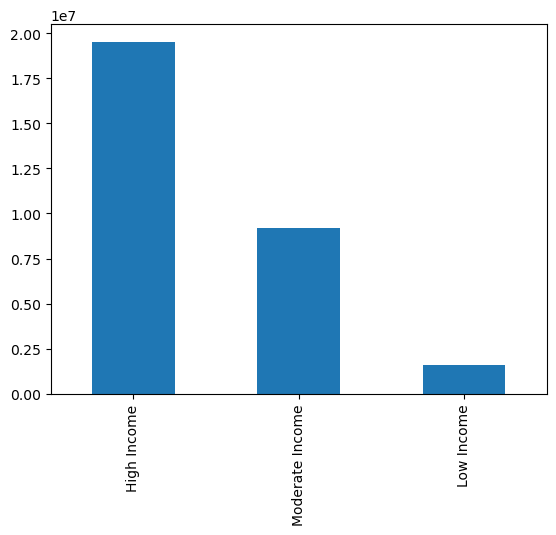

In [23]:
# Visualization for income level.
bar_inc_lev = master_merge['income_level'].value_counts().plot.bar()

Above are income levels by the millions.

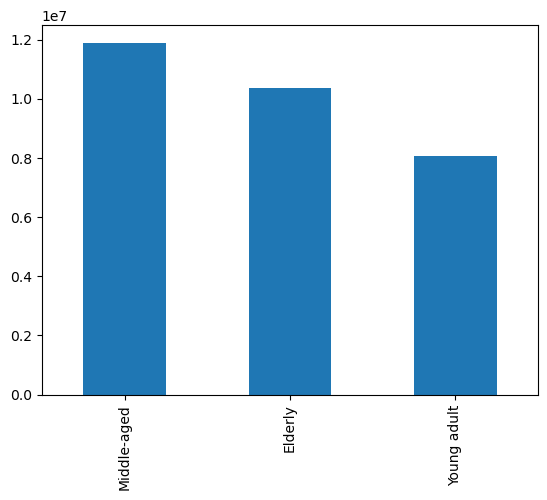

In [24]:
# Visualization for Age group.
bar_age_grp = master_merge['age_group'].value_counts().plot.bar()

Above shows age groups by the millions.

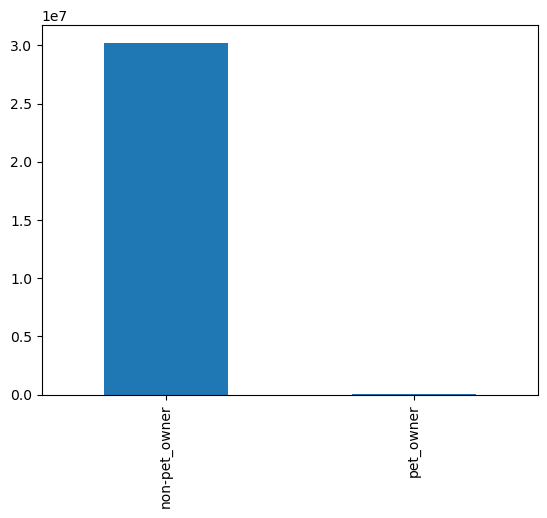

In [25]:
# Visualization for pet owners in departments.
bar_pet_owner = master_merge['pet_owner'].value_counts().plot.bar()

Above shows the pet owners in millions.

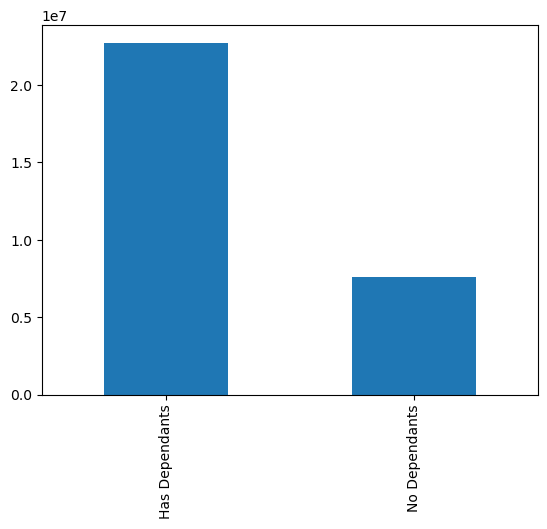

In [26]:
# Visualization for dependants.
bar_depnts = master_merge['dependants'].value_counts().plot.bar()

Above shows dependants in millions.

<function matplotlib.pyplot.show(close=None, block=None)>

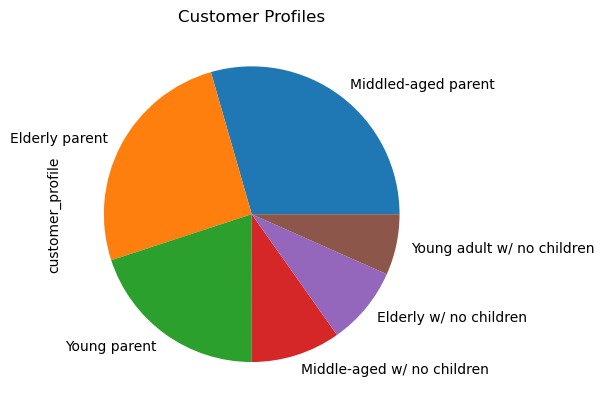

In [27]:
# Pie visualization for customer profile.
pie_cust_prof = master_merge['customer_profile'].value_counts().plot.pie()
plt.title('Customer Profiles')
plt.show

## 7. Aggregating min, max and mean values on customer profiles for usage frequency and expenditure.

In [28]:
# Aggregating min, max and mean values on customer profile for usage frequency.
master_merge.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                             mean  min   max
customer_profile                                            
Elderly parent                          11.107516  0.0  30.0
Elderly w/ no children                  11.047780  0.0  30.0
Middle-aged w/ no children              11.044611  0.0  30.0
Middled-aged parent                     11.122129  0.0  30.0
Young adult w/ no children              11.176475  0.0  30.0
Young parent                            11.102184  0.0  30.0

In [29]:
# Aggregating min, max and mean values on customer profile for expenditure.
master_merge.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                                 mean  min      max
customer_profile                                   
Elderly parent              11.874287  1.0  99999.0
Elderly w/ no children      11.429016  1.0  99999.0
Middle-aged w/ no children  12.711833  1.0  99999.0
Middled-aged parent         11.856591  1.0  99999.0
Young adult w/ no children  12.131034  1.0  99999.0
Young parent                12.110895  1.0  99999.0

## 8. Compare your customer profiles with regions and departments.

In [30]:
# Creating a crosstab for custom profile on regions.
crosstab_cust_region_1 = pd.crosstab(index=master_merge['region'],
                            columns=master_merge['customer_profile'],
                            normalize="index")

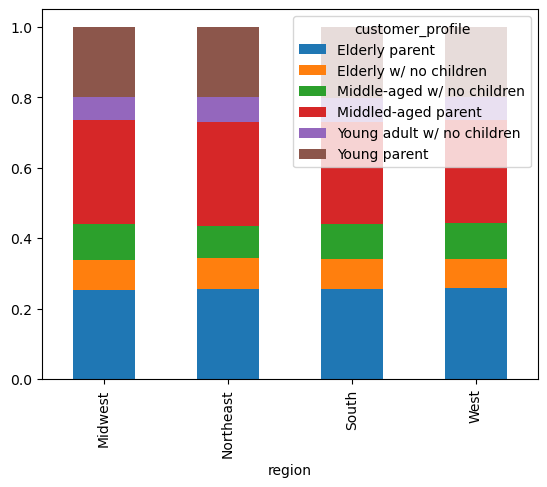

In [31]:
# Creating a stacked bar chart for customer_profile by region.
cust_prof_region = crosstab_cust_region_1.plot(kind='bar', stacked=True)

In [32]:
# Creating a crosstab for custom profile on department.
crosstab_cust_dept_1 = pd.crosstab(index=master_merge['department'],
                            columns=master_merge['customer_profile'],
                            normalize="index")

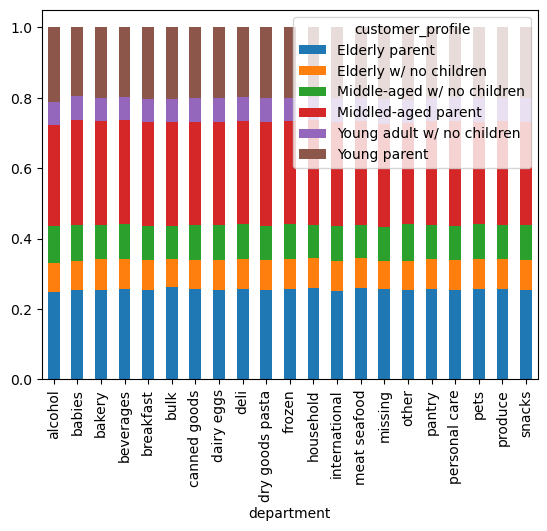

In [33]:
# Creating a stacked bar chart for customer_profile by department.
cust_prof_dept = crosstab_cust_dept_1.plot(kind='bar', stacked=True)

## 9. Exporting visualizations to project folder.

In [35]:
# Exporting figure to project folder.
bar_inc_lev.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_level.png'))

In [36]:
# Exporting figure to project folder.
bar_age_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

In [37]:
# Exporting figure to project folder.
bar_pet_owner.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_owner.png'))

In [38]:
# Exporting figure to project folder.
bar_depnts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependants.png'))

In [39]:
# Exporting figure to project folder.
pie_cust_prof.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_customer_profile.png'))

In [40]:
# Exporting figure to project folder.
cust_prof_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_region.png'))

In [41]:
# Exporting figure to project folder.
cust_prof_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_department.png'))